# Simulation 1
See README.md for a short description.

## Simulation 1.1

The Setup


In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

np.random.seed(0)

In [10]:
"""
Example setup
"""

# nports = the number of ports on the server
nports = 16

# probdetection is the probability that the server detects a scan, after which the server moves the flag
probdetection = 0.1
nepisodes = 100

# Setting the size of the slices of Q each agent will oversee
slic = nports//4

print(slic)

4


In [215]:
"""
Defining the functions we will use throughout the simulations
"""

# Taking in the number of agents and the size of the slice of Q that each agent will oversee
# return a list of agents, the A-team that will carry out the mission
def assemble_team(num_agent,slic):
    listy = []

    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        agent.set_learning_options(exploration=0.2, 
                            learningrate=0.1, 
                            discount=0.9, 
                            scanprobability=0.1)
        listy = [agent]

    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            agent.set_learning_options(exploration=0.2, 
                                learningrate=0.1, 
                                discount=0.9, 
                                scanprobability=0.1)
            listy.append(agent)
    return listy

# M, the agent handler (like 007)
# Run the episodes for each agent
# return the steps from each agent
def M(agent_list,env):
    steps = []
    for agent in agent_list:
        agent.reset(env)
        agent.run_episode()
        steps.append(agent.steps)

    return steps

# Agents report on the success of their mission
# combine the matrices from each agent into a final product
def mission_report(ag_list,name, Diag = False):
    Q = [np.zeros(ag_list[0].nports+1)]
    Qd = np.identity(ag_list[0].nports+1)
    for agent in ag_list:
        # plt.matshow(agent.Q)
        Q += agent.Q
        if Diag:
            Qd *= agent.Q
    # plt.figure(figsize=(10,10))
    plt.matshow(Q)
    plt.suptitle(f"{name}")
    if Diag:
        plt.matshow(Qd)

# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    ex = np.random.random()
    lern = np.random.random()
    disc = np.random.random()
    scan = np.random.random()

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)


# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

## Simulation 1.2
Demonstrating the slices and agent definitions

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

np.random.seed(0)

In [ ]:
nports = 16

probdetection = 0.8
nepisodes = 100

slic = nports//4

print(slic)

4


In [ ]:
"""
Here is how we initialize default agents one at a time
"""

agt1 = agn.Agent(1,slic,nports, verbose=False)
agt1.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

agt2 = agn.Agent(slic, 2*slic, nports, verbose=False)
agt2.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

agt3 = agn.Agent(2*slic, 3*slic, nports, verbose=False)
agt3.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

agt4 = agn.Agent(3*slic, 4*slic, nports, verbose=False)
agt4.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

In [ ]:
"""
Demonstrating the slices of the matrix for each agent
"""

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    agt1.reset(env)
    
    agt1.run_episode()

    agt2.reset(env)
    
    agt2.run_episode()

    agt3.reset(env)
    
    agt3.run_episode()

    agt4.reset(env)
    
    agt4.run_episode()

    steps.append(agt1.steps)

**********


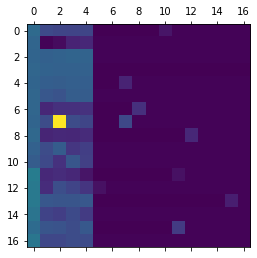

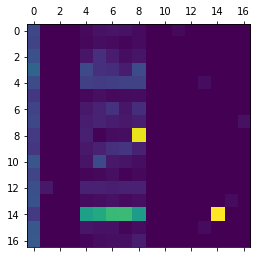

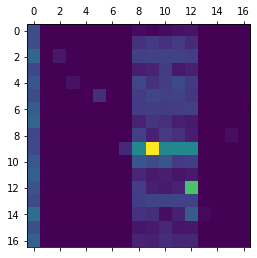

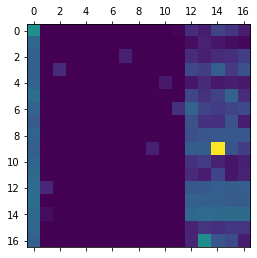

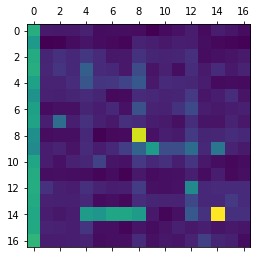

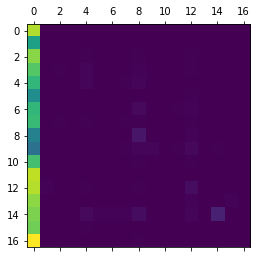

In [ ]:
Q1 = agt1.Q
Q2 = agt2.Q
Q3 = agt3.Q
Q4 = agt4.Q

# Plotting the slices of our final Q given by each agent
plt.matshow(Q1)
plt.matshow(Q2)
plt.matshow(Q3)
plt.matshow(Q4)

# Next we build Q, the matrix given after all agents are considered
Q = Q1+Q2+Q3+Q4
plt.matshow(Q)
print("*"*10)

# Just for fun, seeing what happens when we multiply the matrices
Qd = Q1*Q2*Q3*Q4

plt.matshow(Qd)


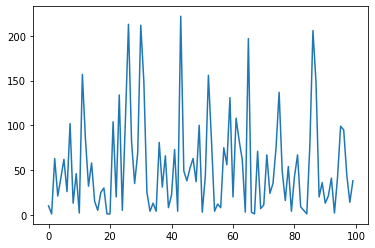

In [ ]:
"""
Seeing how number of steps is affected.
For high scan detection probability, the number of agents and number of episodes doesn't affect
the number of required steps, because the server detects scans and moves the flag.
"""
plt.plot(np.arange(nepisodes),steps)


## Simulation 1.2
Testing

We will try several different base cases using default agent parameters and probdetection = 0.7

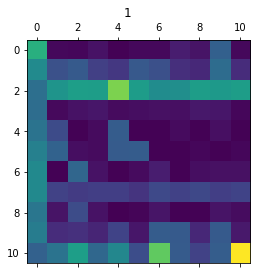

In [201]:
"""
The Control Group: 
16 ports
Default agents
probdetection = 0.7
"""

nports = 16

# num_agent = 5

probdetection = 0.7
nepisodes = 100

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

In [ ]:
"""
100 Ports Control
"""

nports = 100

# num_agent = 5

probdetection = 0.7
nepisodes = 100

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

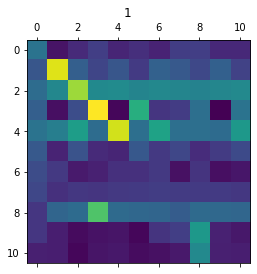

In [203]:
"""
What if I increase the number of episodes to match what the total number of agents do?

10 Ports, 1000000 Episodes
"""

nports = 10

# num_agent = 5

probdetection = 0.7
nepisodes = 1000000

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

In [ ]:
"""
What if I increase the number of episodes to match what the total number of agents do?

100 Ports, 10000 Episodes
"""

nports = 100

# num_agent = 5

probdetection = 0.7
nepisodes = 10000

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

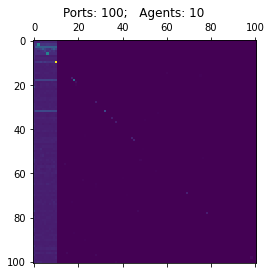

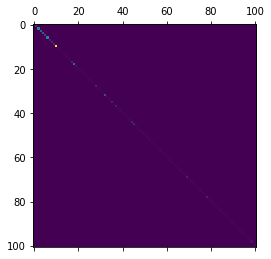

In [221]:
"""
What if more agents than ports???

Check for low ports and high ports, and adjust episodes.

"""
nports = 100

# num_agent = 5

probdetection = 0.7
nepisodes = 10000

ag_list = assemble_team(10,0)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    # print(_)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {10}", Diag = True)


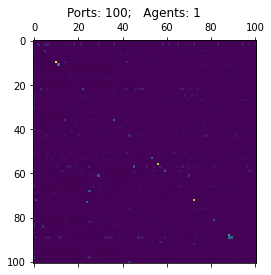

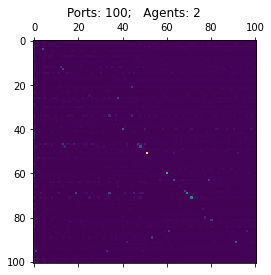

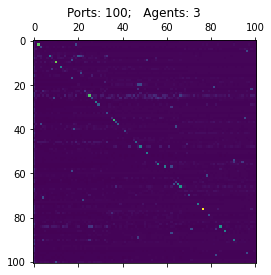

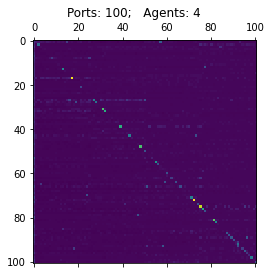

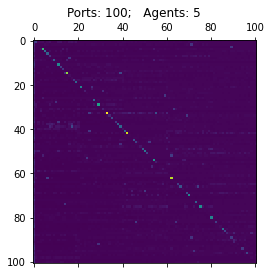

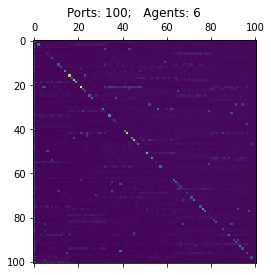

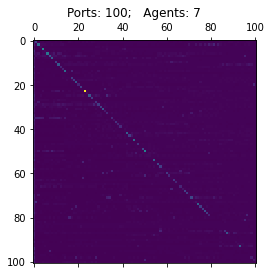

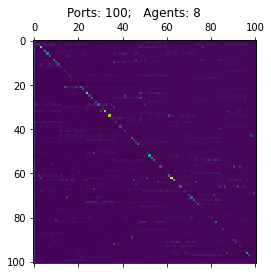

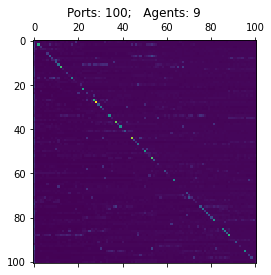

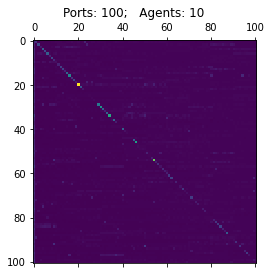

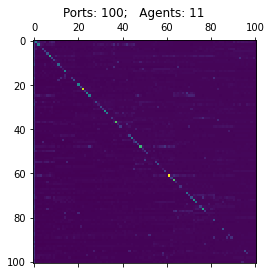

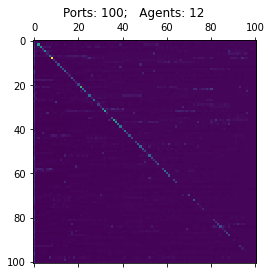

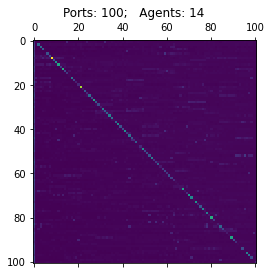

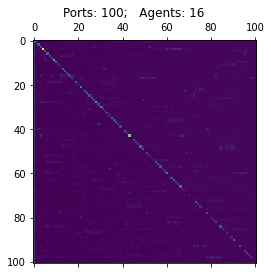

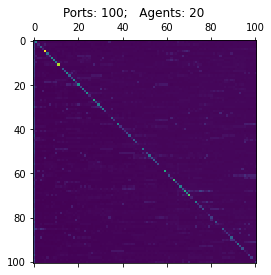

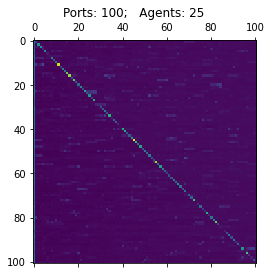

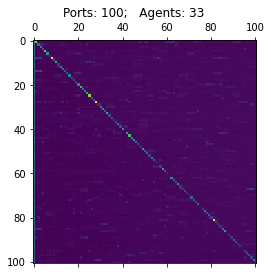

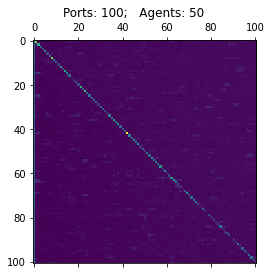

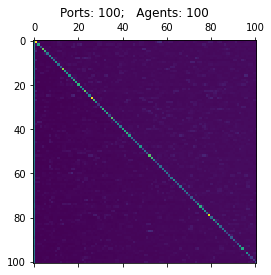

In [197]:
"""
Default Stuff
"""

nports = 100

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
# listy = listy[-5::]
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = assemble_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")

# print(nports)

As before, we mostly learn a diagonal Q matrix.

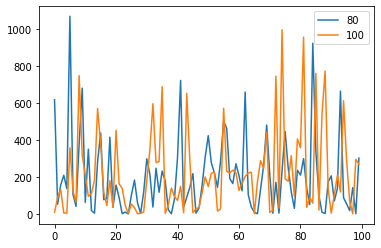

In [135]:
"""
Plotting some of the steps.

As with the original code, high scan detection gives low deviation of number of steps required.
Even for longer episodes
"""

plt.plot(np.arange(nepisodes),steps[len(steps)-5],label=f"{len(steps)-20}")

# plt.plot(np.arange(nepisodes),steps[len(steps)-3],label=f"{len(steps)-5}")

# plt.plot(np.arange(nepisodes),steps[len(steps)-2],label=f"{len(steps)-2}")

# plt.plot(np.arange(nepisodes),steps[len(steps)-2],label=f"{len(steps)-1}")

plt.plot(np.arange(nepisodes),steps[len(steps)-1],label=f"{len(steps)}")

plt.legend(loc="upper right")

We also notice a clear decrease in the number of steps per episode as the agent learns an optimal strategy (remember though that the agent always acts using an $\epsilon$-strategy).

## Simulation 2.3
We now consider a more subtle border case study where *probdetection* = 0.4.

In [62]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

np.random.seed(0)

In [63]:
# Taking in the number of agents and the size of the slice of Q that each agent will oversee
# return a list of agents, the A-team that will carry out the mission
def assemble_team(num_agent,slic):
    listy = []

    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        agent.set_learning_options(exploration=0.2, 
                            learningrate=0.1, 
                            discount=0.9, 
                            scanprobability=0.1)
        listy = [agent]

    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            agent.set_learning_options(exploration=0.2, 
                                learningrate=0.1, 
                                discount=0.9, 
                                scanprobability=0.1)
            listy.append(agent)
    return listy

# M, the agent handler (like 007)
# Run the episodes for each agent
# return the steps from each agent
def M(agent_list,env):
    steps = []
    for agent in agent_list:
        agent.reset(env)
        agent.run_episode()
        steps.append(agent.steps)

    return steps

# Agents report on the success of their mission
# combine the matrices from each agent into a final product
def mission_report(ag_list,name, Diag = False):
    Q = [np.zeros(ag_list[0].nports+1)]
    Qd = np.identity(ag_list[0].nports+1)
    for agent in ag_list:
        # plt.matshow(agent.Q)
        Q += agent.Q
        if Diag:
            Qd *= agent.Q
    # plt.figure(figsize=(10,10))
    plt.matshow(Q)
    plt.suptitle(f"{name}")
    if Diag:
        plt.matshow(Qd)

# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    ex = np.random.random()
    lern = np.random.random()
    disc = np.random.random()
    scan = np.random.random()

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)


# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

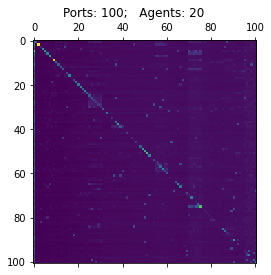

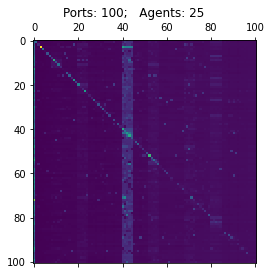

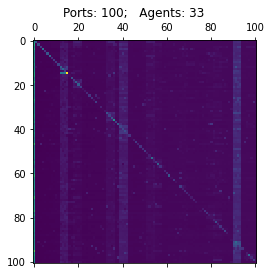

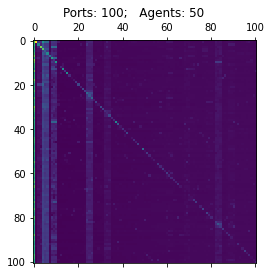

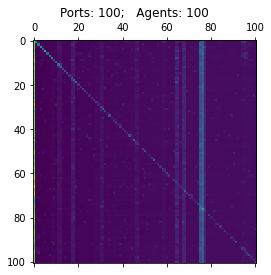

In [66]:
"""
Now we'll see what happens if we start with randomly generated agents

Tested nports = 16 and 
nports = 100 (took 1m 30s)
"""
nports = 100

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
listy = listy[-5::]
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = random_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")

In [156]:
np.random.randint(5)/10

0.4

In [161]:
"""
That looks pretty bad. Let's adjust Q to give smaller numbers for everything except discount
"""


# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    # adding 0.1 to each to avoid zero values
    ex = np.random.randint(1,4)/10
    lern = np.random.randint(1,4)/10
    disc = np.random.random()
    scan = np.random.randint(1,4)/10

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)
    

# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

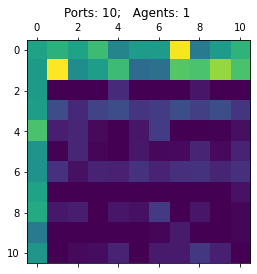

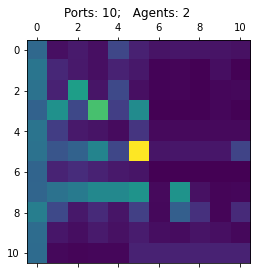

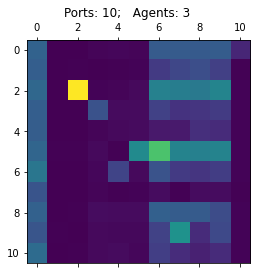

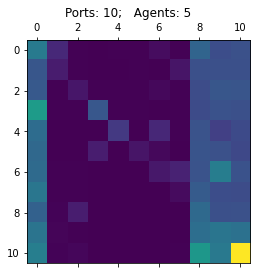

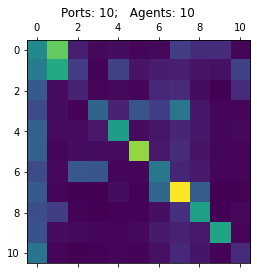

In [168]:
"""
Now we'll see what happens if we start with less randomly generated agents

Tested nports = 16 (took 4s)
and 
nports = 100 (took 1m 18s)
"""
nports = 10

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
# listy = listy[-5::]
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = random_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")

Notice that everything looks better than the completely random option, but still not better than the default for the nports = 100 case.

For nports = 16, the results are comparable to the default case, if not slightly worse or better depending on the run.

In [189]:
"""
One more random try.
Increasing the discovery while again decreasing everything else slightly
"""


# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    ex = np.random.randint(1,3)/10
    lern = np.random.randint(1,3)/10
    disc = np.random.randint(8,10)/10-0.01 # Subtracting 0.01 to avoid 1 values
    scan = np.random.randint(1,3)/10

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)
    

# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

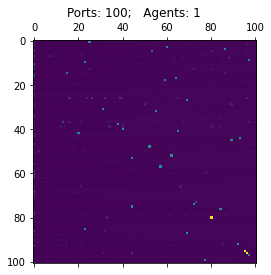

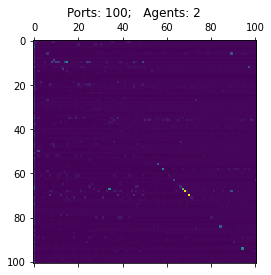

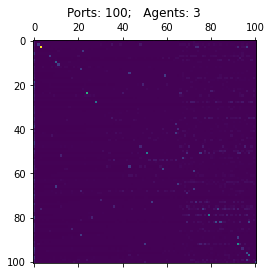

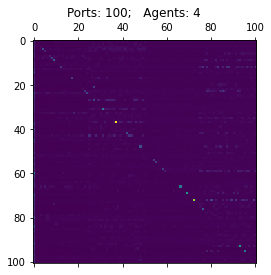

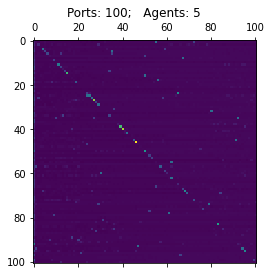

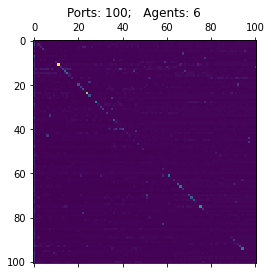

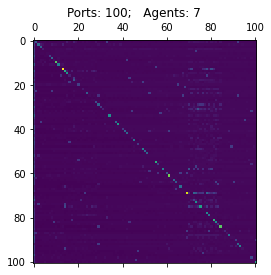

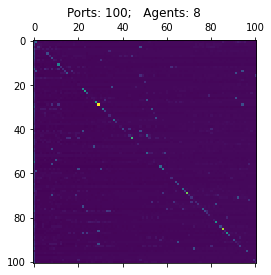

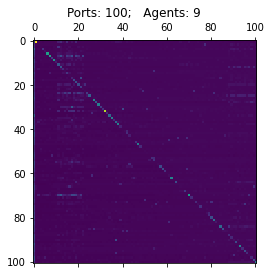

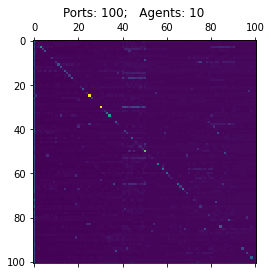

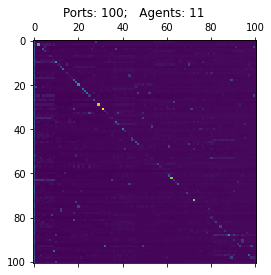

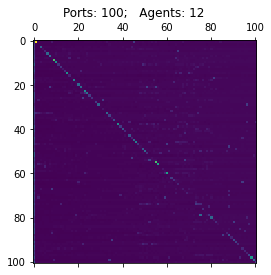

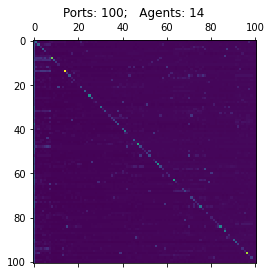

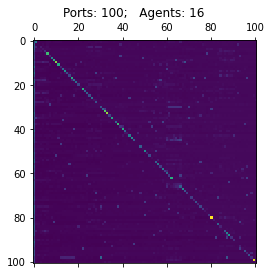

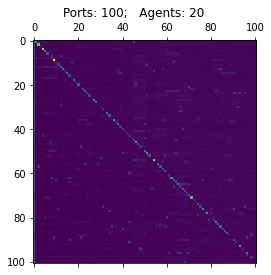

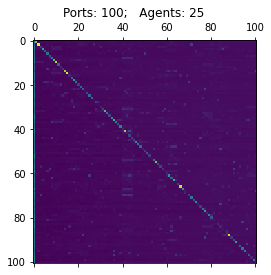

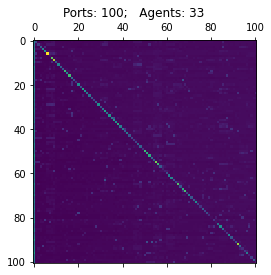

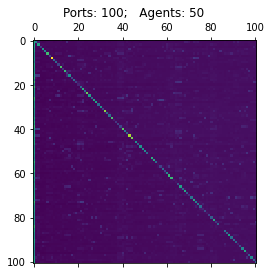

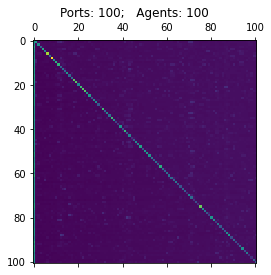

In [192]:
"""
Once again...

Tested nports = 16 (took 6s)
and 
nports = 100 (took 1m 18s)
"""
nports = 100

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
# listy = listy[-5::]
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = random_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")

Seems that, even with adjusting the parameters greatly, random agents do not perform as well as the default agents

For the 100 ports case, we still have quick convergence, but there is a lot of extra noise in the early cases. More agents reduce the noise to be comparable with the default agents.

## Simulation 2.4
We run the training for *probdetection* = 0.4 for longer.

In [ ]:
probdetection = 0.4
nepisodes = 1000

In [ ]:
agt = agn.Agent(nports)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

In [ ]:
steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    agt.reset(env)
    
    agt.run_episode()
    steps.append(agt.steps)


Game reset
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Flag captured

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happ

Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
N

Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing

Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Noth

Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered op

Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happen

Flag captured

Game reset
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discov

Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing h

Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open p

Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)


Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing hap

Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happen

Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothin

Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovere

Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing ha

Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port

Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened


Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Discovered open port(s)
Discovered open port(s)
Discovered open port(s)
Discovered open 

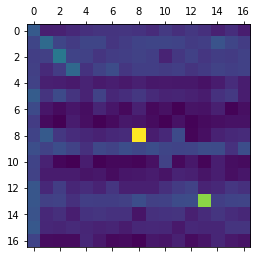

In [ ]:
plt.matshow(agt.Q)

Again, the diagonal pattern starts to appear, but it is obfuscated by the high noise of *probdetection*.

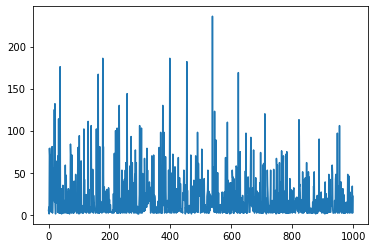

In [ ]:
plt.plot(np.arange(nepisodes),steps)

We also notice a mild trend in a decreasing number of steps, but once again randomness strongly affect the number of steps the agent has to take.

## Simulation 2.5
We run simulations with different values of probdetection for $100$ times in order to collect statistics.

In [ ]:
ntrials = 100

probdetections = np.linspace(0,1,11)
nprobdetection = len(probdetections)

nepisodes = 1000

steps = np.zeros((ntrials,nprobdetection,nepisodes))
Q_diag = np.zeros((ntrials,nprobdetection,nepisodes))
Q_ndiag = np.zeros((ntrials,nprobdetection,nepisodes))
Qs = np.zeros((ntrials,nprobdetection,nports+1,nports+1))

for t in tqdm(range(ntrials)):

    agt = agn.Agent(nports,verbose=False)
    agt.set_learning_options(exploration=0.2, 
                             learningrate=0.1, 
                             discount=0.9, 
                             scanprobability=0.1)

    for p in range(nprobdetection):
        probdetection = probdetections[p]
    
        nepisodes = 1000
        for e in range(nepisodes):

            vulnport = np.random.randint(1,nports+1)
            env = srv.Server(nports,vulnport,probdetection)
            agt.reset(env)

            agt.run_episode()

            steps[t,p,e] = agt.steps
            Q_diag[t,p,e] = np.sum(np.diag(agt.Q))
            Q_ndiag[t,p,e] = np.sum(agt.Q)
            Qs[t,p,:,:] = agt.Q

100%|█████████████████████████████████████████| 100/100 [01:23<00:00,  1.19it/s]


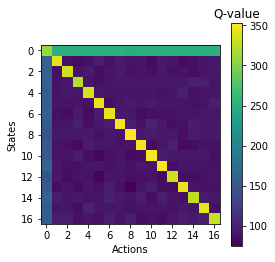

In [ ]:
plt.matshow(np.mean(Qs[:,1,:,:],axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')

plt.savefig('simul2_matrix1',dpi=300)

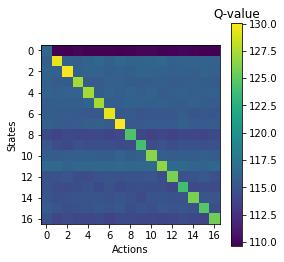

In [ ]:
plt.matshow(np.mean(Qs[:,5,:,:],axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')

plt.savefig('simul2_matrix2',dpi=300)

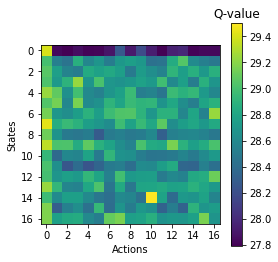

In [ ]:
plt.matshow(np.mean(Qs[:,10,:,:],axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')

plt.savefig('simul2_matrix3',dpi=300)

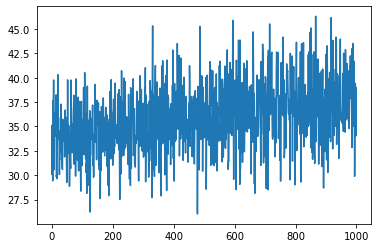

In [ ]:
plt.plot(range(nepisodes),np.mean(steps[:,10,:],axis=0))

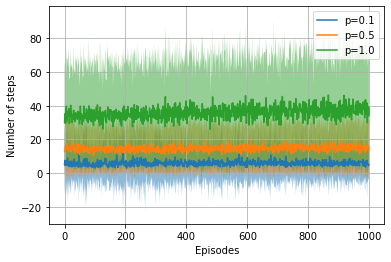

In [ ]:
x = range(nepisodes)
y = np.mean(steps[:,1,:],axis=0); ystd = np.std(steps[:,1,:],axis=0)
plt.plot(x,y,label='p=0.1')
plt.fill_between(x,y-ystd,y+ystd,alpha=.5)

y = np.mean(steps[:,5,:],axis=0); ystd = np.std(steps[:,5,:],axis=0)
plt.plot(x,y,label='p=0.5')
plt.fill_between(x,y-ystd,y+ystd,alpha=.5)

y = np.mean(steps[:,10,:],axis=0); ystd = np.std(steps[:,10,:],axis=0)
plt.plot(x,y,label='p=1.0')
plt.fill_between(x,y-ystd,y+ystd,alpha=.5)

plt.xlabel('Episodes')
plt.ylabel('Number of steps')
plt.legend()
plt.grid()

plt.savefig('simul2_steps',dpi=300)